In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Heart_Dataset.csv')

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal',]]
Y = data['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf_1 = RandomForestClassifier(max_depth=10)
clf_1.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10)

In [13]:
Y_test_pred = clf_1.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

asc = accuracy_score(Y_test,Y_test_pred)
ps = precision_score(Y_test,Y_test_pred)
rs = recall_score(Y_test,Y_test_pred)
f1_s = f1_score(Y_test,Y_test_pred)

print('Accuracy :',asc)
print('Precision :',ps)
print('recall :',rs)
print('f1_s :',f1_s)


Accuracy : 0.8461538461538461
Precision : 0.8113207547169812
recall : 0.9148936170212766
f1_s : 0.8600000000000001


In [15]:
clf_1.feature_importances_

array([0.08201463, 0.04079805, 0.1177665 , 0.07068062, 0.07896151,
       0.01219415, 0.01671543, 0.11508621, 0.05969661, 0.10972553,
       0.04734956, 0.12544885, 0.12356235])

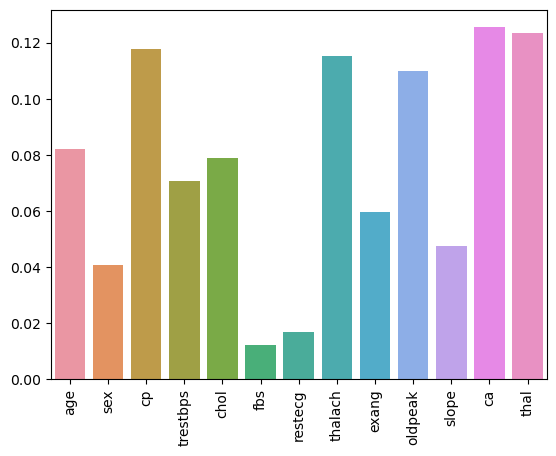

In [20]:
sns.barplot(x=X.columns,y=clf_1.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [22]:
from sklearn.model_selection import KFold
fold = KFold(n_splits=5)

In [24]:
Parameters = {
    
    "n_estimators" : [10,14,50,100,150,200],
    "criterion" : ['gini','entropy','log_loss'],
    "max_depth" : [3,5,7,10],
    "min_samples_split" : [2,3,5],
    'min_samples_leaf' : [1,2,3]
} 


In [26]:
from sklearn.model_selection import GridSearchCV
clf_2 = RandomForestClassifier()
GSCV = GridSearchCV(clf_2,param_grid=Parameters,scoring='accuracy',cv=fold)

In [27]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [10, 14, 50, 100, 150, 200]},
             scoring='accuracy')

In [28]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [33]:
clf_3 = RandomForestClassifier(criterion='gini',max_depth=5,min_samples_leaf=3,min_samples_split=2,n_estimators=50)
clf_3.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=50)

In [34]:
Y_test_pre_2 = clf_3.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

asc = accuracy_score(Y_test,Y_test_pre_2)
ps = precision_score(Y_test,Y_test_pre_2)
rs = recall_score(Y_test,Y_test_pre_2)
f1_s = f1_score(Y_test,Y_test_pre_2)

print('Accuracy :',asc)
print('Precision :',ps)
print('recall :',rs)
print('f1_s :',f1_s)


Accuracy : 0.8351648351648352
Precision : 0.7962962962962963
recall : 0.9148936170212766
f1_s : 0.8514851485148516
